## Tensorflow 2.0

Tensorflow Official Docs

- https://www.tensorflow.org
- https://www.tensorflow.org/api_docs/python/tf/all_symbols
- https://www.tensorflow.org/lite/

Deep Learning tasks
- Image recognition
- speech recognition
- sentiment analysis
- object detection 
- ...

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

### Tensorflow 2.0 vs Tensorflow 1.0

Consigli per usare Tensorflow2.0

  -  Refactor your code into smaller functions
  -  Use Keras layers and models to manage variables
  -  Combine tf. data.Datasets and tf. function
  -  Take advantage of AutoGraph with Python control flow
  -  tf. metrics aggregates data and tf. summary logs them
  -  Use tf.config.experimental_run_functions_eagerly() when debugging

tf.layers is depreciated in favour of tf.keras.layers. In fact, I sometimes joke that TF 2.0 is really Keras 3.0

### Migrate from TF1 to TF2
The TensorFlow team has created the tf_upgrade_v2 utility to help transition legacy code to the new API automatically


A) Project directory
```
tf_upgrade_v2 \
  --intree my_project/ \
  --outtree my_project_v2/ \
  --reportfile report.txt
```


B) Single file
```
tf_upgrade_v2 
 — infile <input_file_name/payj>
 — outfile <output_file_name/path>.py```
```

### Tensor2Tensor
The main purpose of T2T is to accelerate Deep Learning research by giving access to state-of-the-art models to everyone. Right now it mostly focused on NLP problems and sequence-to-sequence in general. However, it’s built on top of Tensorflow and modular structure of Tensor2Tensor allows developers and researchers to add new models in a simple way.

This python lib provides simple API for dataset generation, training and hyper-parameter tuning. It contains:

 - Popular sequence datasets generation tool
 - Models for work with different input/output modalities: symbolic, images, audio, labels
 - Pre-tuned sets of hyper-parameters for models and their optimizers
 - Trainer with a simple CLI interface
 - SOTA models like ByteNet, MultiModel(paper), SliceNet, Transformer(paper) and Xception

In [3]:
tf.constant(5)

2022-06-13 06:36:43.427858: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-13 06:36:43.775511: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-13 06:36:43.775606: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kobayashi): /proc/driver/nvidia/version does not exist
2022-06-13 06:36:43.778462: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-06-13 06:36:43.826097: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2899885000 Hz
2022-06-13 06:36:43.826790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f686c000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-13 06:

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [9]:
normal_tensor = tf.random.normal((2,2), mean=1, stddev=1.0) 
normal_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.1986716,  1.4644482],
       [ 1.7050643, -0.4704305]], dtype=float32)>

In [11]:
uniform_tensor = tf.random.uniform((2,2))
uniform_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.8421223 , 0.09556603],
       [0.5663922 , 0.32612455]], dtype=float32)>

In [14]:
gamma_tensor = tf.random.gamma((2,2), alpha=1)
gamma_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.33633512, 0.18374662],
       [0.5135709 , 0.5728498 ]], dtype=float32)>

In [16]:
tf.reshape(gamma_tensor, [1, 4])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.33633512, 0.18374662, 0.5135709 , 0.5728498 ]], dtype=float32)>

In [17]:
(tf.expand_dims(gamma_tensor, 0)).shape  # GET DIMENSIONS (shape) Inserts a dimension of 1 into a tensor's shape.

TensorShape([1, 2, 2])

In [24]:
a = tf.zeros([3,3])
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [25]:
b = tf.ones([3,3])
b

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [26]:
a.get_shape()

TensorShape([3, 3])

In [33]:
c = tf.reduce_sum(a , 1) # riduci indice di 1

print(c.get_shape())
print(c)

(3,)
tf.Tensor([0. 0. 0.], shape=(3,), dtype=float32)


In [34]:
tf.reshape(c, (3,1))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [35]:
tf.matmul(a, b) # moltiplicazione fra matrici (dot)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [37]:
a[0,0], a[:,0], a[0,:] # slicing

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>)

In [40]:
d = tf.constant(3.0)

In [41]:
e = tf.constant(4.0)

In [43]:
f = d * e
f

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

Returns the index with the largest value across dimensions of a tensor.

In [21]:
a = tf.convert_to_tensor([[1, 10, 7], 
                           [3, 4, 9]])

MAX = tf.argmax(a,axis=1) # [1,2]

MIN = tf.argmin(a,axis=1) # [0,0]

print(MAX)
print(MIN)

tf.Tensor([1 2], shape=(2,), dtype=int64)
tf.Tensor([0 0], shape=(2,), dtype=int64)


Return the product of all elements in the tensor or product of the tensor along specified axis

In [24]:
A = tf.reduce_prod(a) # 7560
B = tf.reduce_prod(a,axis = 0) # [3,40,63]
C = tf.reduce_prod(a,axis = 1) # [70,108]

print(A)
print(B)
print(C)

tf.Tensor(7560, shape=(), dtype=int32)
tf.Tensor([ 3 40 63], shape=(3,), dtype=int32)
tf.Tensor([ 70 108], shape=(2,), dtype=int32)


Return the product of all elements in the tensor or product of the tensor along specified axis.

In [27]:
D = tf.reduce_mean(a) # 7560
E = tf.reduce_mean(a,axis = 0) # [3,40,63]
F = tf.reduce_mean(a, axis = 1) # [70,108]

G = tf.reduce_max(a) # 10
H = tf.reduce_max(a,axis = 0) # [3,10,9]
I = tf.reduce_max(a,axis = 1) # [70,108]

L = tf.reduce_min(a) # 1
M = tf.reduce_min(a,axis = 0) # [1,4,7]
N = tf.reduce_min(a,axis = 1) # [1,3]


print(D)
print(E)
print(F)
print(G)
print(H)
print(I)
print(L)
print(M)
print(N)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([2 7 8], shape=(3,), dtype=int32)
tf.Tensor([6 5], shape=(2,), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor([ 3 10  9], shape=(3,), dtype=int32)
tf.Tensor([10  9], shape=(2,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 4 7], shape=(3,), dtype=int32)
tf.Tensor([1 3], shape=(2,), dtype=int32)


## Download images from internet as Datasets

In [61]:
import requests # to get image from the web

image_url = 
filename = image_url.split("/")[-1]

# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    print(r.status_code)
    print(r.raw)

200


In [56]:
import os
import requests

img_data = requests.get("https://commons.wikimedia.org/wiki/File:Cat_November_2010-1a.jpg").content

print(img_data)


b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>File:Cat November 2010-1a.jpg - Wikimedia Commons</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":true,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e65a6115-17db-46fc-aebf-21b20612757b","wgCSPNonce":false,"wgCanonicalNamespace":"File","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":6,"wgPageName":"File:Cat_November_2010-1a.jpg","wgTitle":"Cat November 2010-1a.jpg","wgCurRevisionId":655193360,"wgRevisionId":655193360,"wgArticleId":12127693,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Photographs taken on 2010-11-21","Pictures of the day (2011)","Featured pictures on Wikimedia

In [42]:
IMAGE_URLS = ['https://commons.wikimedia.org/wiki/File:Cat_November_2010-1a.jpg',
             ]

img_dataset = tf.data.Dataset.from_tensor_slices(IMAGE_URLS)

print(img_dataset)

<TensorSliceDataset shapes: (), types: tf.string>


In [43]:
gfg = tf.data.Dataset.from_tensor_slices([[5, 10], [3, 6]])
  
for ele in gfg:
    print(ele.numpy())

b'https://commons.wikimedia.org/wiki/File:Cat_November_2010-1a.jpg'
b'https://commons.wikimedia.org/wiki/File:Pumiforme.JPG'


In [75]:
data_path = os.path.abspath('.') + "/my_data_folder/"
train_zip_url = 'http://images.cocodataset.org/zips/train2014.zip'
name_of_zip = "my_train_data.zip"

train_zip = tkeras.utils.get_file(name_of_zip,
                                      cache_subdir=data_path,
                                      origin = train_zip_url ,
                                      extract = True)

AttributeError: module 'tensorflow.python.keras.utils' has no attribute 'get_file'

### tf.function

Where tf.function is a decorator that "defines a TensorFlow function". A "TensorFlow function" defines a computation as a graph of TensorFlow operations, with named arguments and explicit return values. Users define the function they want TensorFlow to "accelerate" as a Python function and integrate it into their Python program like any other Python function call.


Every argument to a function decorated Python function (F) must be either:

  - A Tensor object (NumPy ndarrays are converted to the equivalent Tensor), or
  - A list of Tensor objects, or
  - An arbitrary Python value.


In [56]:
import tensorflow as tf

@tf.function
def compute_z1(x, y):
  return tf.add(x, y)

@tf.function
def compute_z0(x):
  return compute_z1(x, tf.square(x))

z0 = compute_z0(2.)
z1 = compute_z1(2., 2.)

print(z0)
print(z1)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


## Linear Regression in TensorFlow

In [58]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 120.2 kB/s eta 0:00:001m115.6 kB/s eta 0:00:01


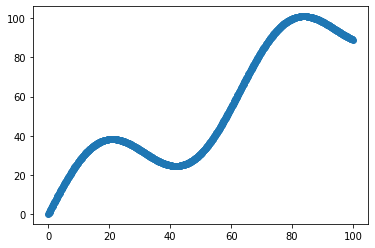

In [60]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

plt.scatter(X_data, y_data)

In [61]:
# Define data size and batch size
n_samples = 1000
batch_size = 100

In [69]:
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

W = np.random(n_samples)
b = np.random(n_samples)

y_pred = tf.matmul(X, W) + b

TypeError: 'module' object is not callable

# Custom Layer

In [79]:
class MyDenseLayer(keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                        shape=[int(input_shape[-1]),
                                               self.num_outputs])

    def call(self, input):
        return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)

# Custom Model

In [77]:
class ResnetIdentityBlock(keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

    
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)



## Gradient tape
By default, the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called. To compute multiple gradients over the same computation, create a persistent gradient tape. This allows multiple calls to the gradient() method as resources are released when the tape object is garbage collected. 

In [84]:
with tf.GradientTape() as g:
    x = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
    g.watch(x)
    y = x * x

batch_jacobian = g.batch_jacobian(y, x)
print(batch_jacobian)

tf.Tensor(
[[[2. 0.]
  [0. 4.]]

 [[6. 0.]
  [0. 8.]]], shape=(2, 2, 2), dtype=float32)
